# 동기(Synchronous), 비동기(asynchronous) 프로그래밍이란

<img src="https://i.imgur.com/hh3Mawr.png" width="640">
<center><이미지출처> https://learnjs.vlpt.us/async/</center>

-   **동기적 처리**
    -   호출된 순서대로 종료된다.
    -   하나의 작업이 끝나야 다른 작업을 실행할 수 있다.
    -   cpu 작업과 io 작업을 번갈아 가면서 할 경우 자원이 효율적으로 사용되지 않는다.
-   **비동기적 처리**
    -   호출된 순서대로 종료되지 않을 수 있다.
    -   하나의 작업이 끝나지 않아도 다른 작업이 실행 될 수 있다.
    -   동시에 여러 작업을 실행할 수 있다.


# 코루틴(co-routine)을 이용한 비동기 프로그래밍


## 메인루틴과 서브루틴

-   **루틴이란**
    -   코드의 실행흐름을 말한다.
-   **메인 루틴**
    -   프로그램의 메인 흐름을 말한다. 동기적으로 처리된 프로그램의 경우 메인루틴이 종료되면 프로그램이 종료된다.
-   **서브루틴**
    -   메인루틴의 보조역할을 한다.
    -   하나의 진입점과 하나의 탈출점을 가진다.
        -   보통 메인루틴에서 호출한 함수나 메소드를 말한다.
-   메인루틴과 서브루틴의 동기적 실행 - 메인 루틴이 서브루틴을 호출하면 메인루틴은 대기하고 서브루틴이 동작한다. - 서브루틴이 종료되면 서브루틴은 제거되고 메인루틴으로 돌아와 나머지를 실행한다.
    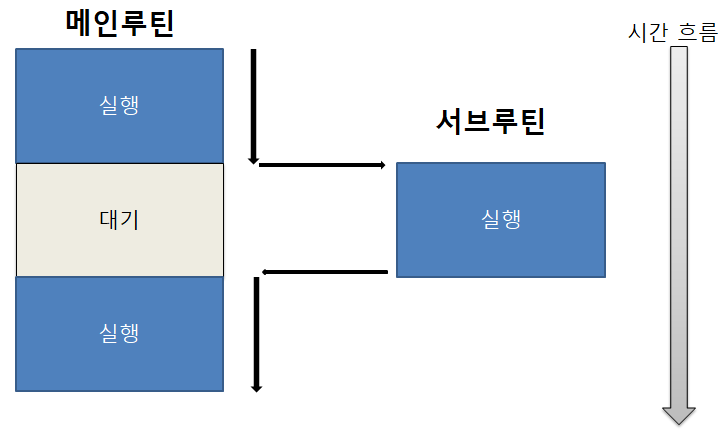


## 코루틴

-   메인루틴에서 호출되는 또 다른 형태의 서브루틴
    -   진입점과 탈출점이 여러개인 실행흐름이다.
    -   python은 generator 기반의 구현과 async/await를 이용한 구현 방식을 제공한다.
-   서브루틴과 차이점
    -   서브루틴은 실행이 끝나고 메인루틴으로 돌아가면 종료되어 사라지지만, **코루틴은 일시 정지 상태를 제공하여** 메인루틴과 상호작용이 가능하다.
    -   서브루틴은 진입점과 반환점이 단 하나밖에 없어 메인루틴에 종속적이지만, 코루틴은 진입지점이 여러개이기 때문에 메인루틴에 종속적이지 않아 대등하게 데이터를 주고 받을 수 있다.


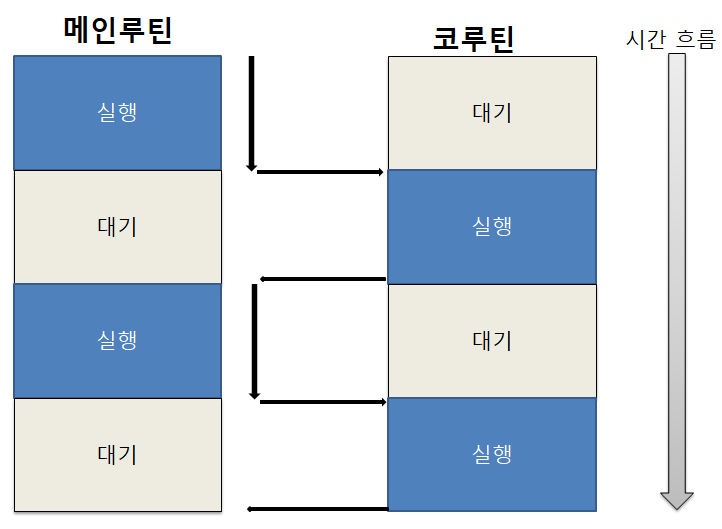


### 코루틴 개념코드

-   Generator는 코루틴의 한 종류이다.

> #### Generator
>
> -   Iterable 타입 중 하나로 요청을 받으면 값을 하나씩 제공한다.
> -   자료구조등과 차이점은 제공하는 값을 가지고 있지 않고 값을 제공하는 알고리즘(로직) 만 정의해서 가지고 있다.
> -   구현은 함수와 비슷하나 구현부에 yield가 있으면 generator 구현이다.
> -   **generator와 함수는 다르다.**


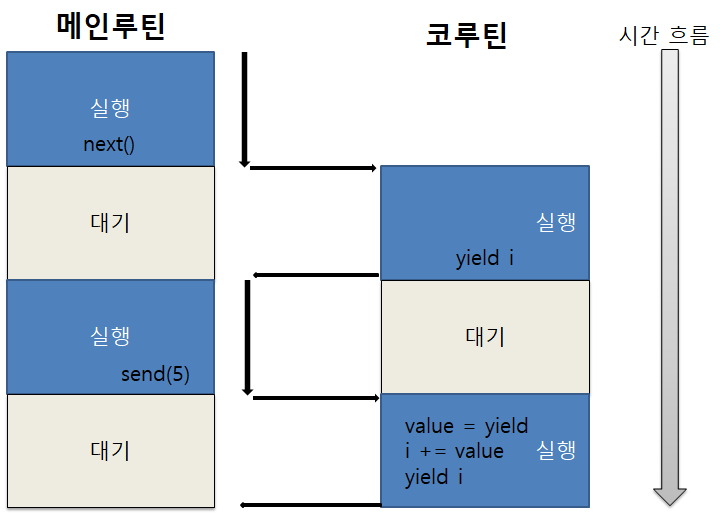


# 이벤트 루프 (Event Loop)를 이용한 동시성 프로그래밍

-   여러개의 작업들을 등록해 놓고 반복문을 돌면서(Loop) 하나씩 실행시킨다. 만약 실행 시킨 작업에 **I/O blocking**과 같이 응답을 기다려야 한다면 이 작업은 통제권을 이벤트 루프에 돌려준다. 통제권을 받은 이벤트 루프는 대기중인 다음 작업을 실행 시킨다. (IO blocking등의 응답 대기 상태때문에 통제권을 이벤트 루프에 돌려주고) 대기했던 작업이 다시 실행되면 멈췄던 부분 다음 부터 실행하게 된다.
-   파이썬에서는 이벤트 루프에 의해 실행되는 Task는 실행과 대기를 반복해야 하므로 서브루틴(함수)이 아닌 **코루틴**으로 구성한다.

> -   **동시성(concurrency) 프로그래밍**
>     -   한번에 여러 작업을 동시에 처리한다.


# asyncio

-   이벤트 루프와 코루틴을 기반으로 동시성(concurrent) 프로그램을 작성할 수 있도록 해주는 파이썬 모듈.

## 네이티브 코루틴 정의

-   `async def` 를 이용해 코루틴 정의
    -   def 앞에 `async` 예약어를 붙이면 코루틴을 정의하는 것이 된다.
-   `await 코루틴` 을 이용해 코루틴 호출
    -   async로 선언된 코루틴을 호출 할 때는 await 예약어를 붙여서 호출해야 한다.
        -   async 코루틴을 awaitable 타입이라고 한다.
        -   await를 붙이지 않으면 코루틴 객체가 반환된다.
        -   코루틴을 비동기적으로 실행 시키기 위해서는 Task로 만들어야 한다.
-   여러개의 코루틴을 비동기적으로 실행해야 하는 경우 `await asyncio.gather(코루틴, 코루틴, ...)` 으로 묶어서 호출한다.
-   main routine에서 코루틴을 호출 할 경우 `asyncio.run(코루틴)` 을 이용해 실행한다.
    -   코루틴이 아닌 함수에서 코루틴을 호출할 때 `asyncio.run()`을 사용

```python
async def test():
    pass

async def main():
    await test()

if __name__ == '__main__':
    asyncio.run(main())
```

> 일반함수 (async를 붙이 지 않고 선언한)를 비동기적으로 실행해야 하는 경우 `EventLoop객체.run_in_executor(None, 함수)`를 이용해 호출 한다. 이 경우 **Thread를 이용해 실행된다.**
>
> ```python
> loop = asyncio.get_event_loop()
> loop.run_in_executor(None, test)
> ```


> ## asyncio와 주피터노트북에서 에러
>
> -   그냥 실행하면 RuntimeError 발생
>     -   `RuntimeRrror: asyncio.run() cannot be called from a running event loop
> -   asyncio는 ipykernel 환경에서 event loop가 지원되지 않는 문제가 있다.
> -   nest_asyncio 설치
>     -   `pip install nest_asyncio`
> -   아래코드 실행 (처음 한번만 실행한다.)
>
> ```python
> import nest_asyncio
> nest_asyncio.apply()
> ```
>
> -   **터미널에서 cli로 실행할 경우는 상관없다.**


# aiohttp 패키지

-   https://docs.aiohttp.org/en/stable/
-   asyncio를 위한 비동기 서버/클라이언트 처리를 위한 파이썬 라이브러리.
-   설치
    -   `pip install aiohttp`


In [ ]:
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36"

base_url = "https://dictionary.cambridge.org/dictionary/english-korean/{}"

keywords = [

    "hi",

    "apple",
    "banana",

    "call",

    "feel",

    "hello",

    "bye",

    "like",

    "love",

    "environmental",

    "buzz",

    "ambition",

    "determine",

]